<a href="https://colab.research.google.com/github/TenzingJoseph/CTS-Python/blob/main/BreastCancer_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required Libraries

In [1]:
import numpy as np                # Multi-Dimensional array object
import pandas as pd               # Data Manipulation
import matplotlib.pyplot as plt   # Data Visualization
import seaborn as sns             # Data Visualization 

## Loading required Dataset

In [2]:
url = 'https://raw.githubusercontent.com/a-forty-two/CGI-DPplusPy/main/breastcancer_data.csv'
df1 = pd.read_csv(url)

In [3]:
# Load the top 5 instance
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [4]:
# Load the bottom 5 instance
df1.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
1133,93316,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623
1134,93317,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533
1135,93318,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648
1136,93319,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016
1137,93320,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.1587,0.05884


## Data Understanding

In [5]:
# Check the shape of the dataframe

df1.shape

(1138, 11)

In [6]:
# Display the features of the datframe

df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [7]:
# Obtain the summary of the dataframe

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [8]:
# Obtain the description of the dataframe

df1.drop('id', axis=1).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798
std,3.522499,4.299144,24.288293,351.759340,0.014058,0.052790,0.079685,0.027402,0.007057
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440


## Data Preparation

In [9]:
# Check for the missing values

df1.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [10]:
continuous = df1.select_dtypes(include=[np.number])
continuous.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [16]:
categorical = df1.select_dtypes(include=[np.object])
categorical.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Index(['diagnosis'], dtype='object')

In [18]:
class category:
    def unique_feature(feature):
        for feature in categorical:
            print(feature,df1[feature].unique())

In [19]:
category.unique_feature(['diagnosis'])

diagnosis ['M' 'B']


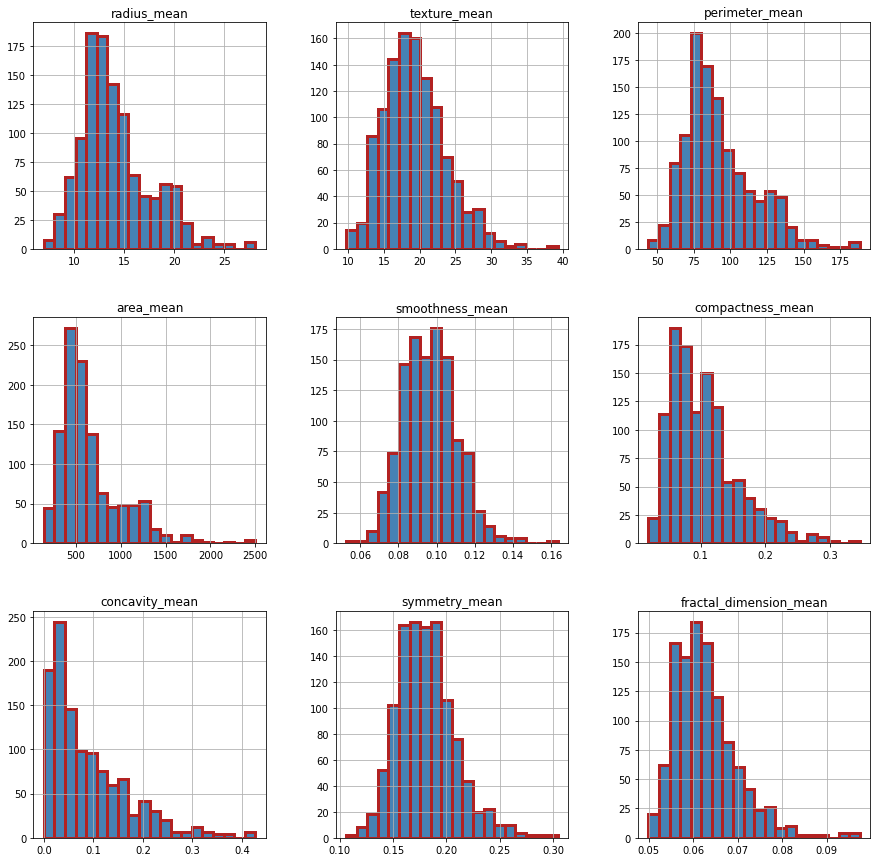

In [13]:
# Histogram for each continuous variable

continuous.drop('id', axis=1).hist(figsize=(15, 15), bins=20, layout=(3, 3), color='steelblue',
                                   edgecolor='firebrick', linewidth=3);

In [22]:
# Skew Values

continuous.drop('id', axis=1).skew()

radius_mean               0.941134
texture_mean              0.649590
perimeter_mean            0.989341
area_mean                 1.643558
smoothness_mean           0.455721
compactness_mean          1.188551
concavity_mean            1.399328
symmetry_mean             0.724650
fractal_dimension_mean    1.302765
dtype: float64

In [23]:
# Kurtosis Vaues

continuous.drop('id', axis=1).kurt()

radius_mean               0.836522
texture_mean              0.749703
perimeter_mean            0.962657
area_mean                 3.630963
smoothness_mean           0.846930
compactness_mean          1.637593
concavity_mean            1.984568
symmetry_mean             1.276989
fractal_dimension_mean    2.987394
dtype: float64

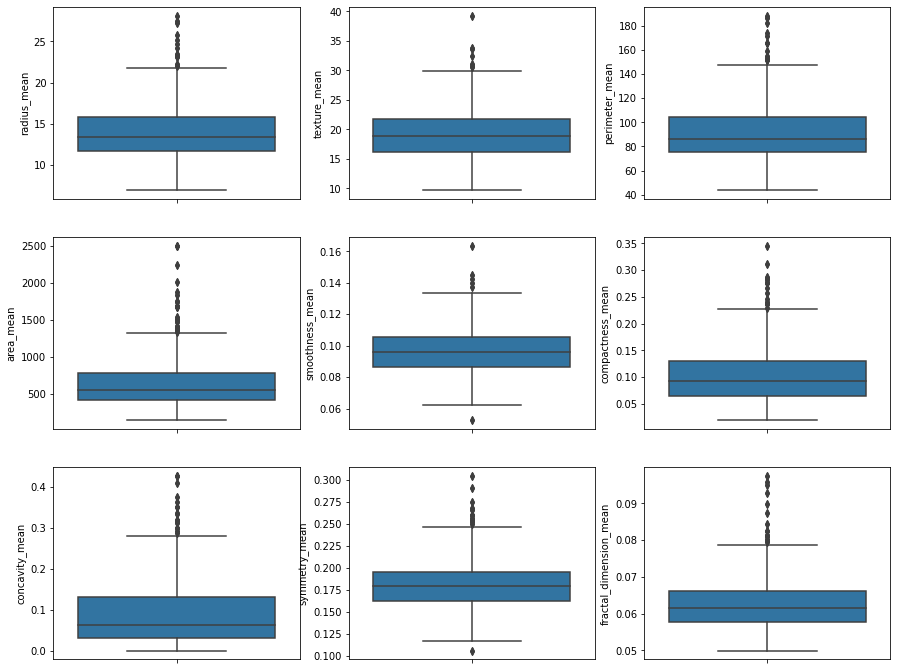

In [14]:
# Boxplot to check the presence of outliers

fig, axes = plt.subplots(3, 3, figsize = (15, 12))
sns.boxplot(data = continuous, y = 'radius_mean', ax = axes[0,0])
sns.boxplot(data = continuous, y = 'texture_mean', ax = axes[0,1])
sns.boxplot(data = continuous, y = 'perimeter_mean', ax = axes[0,2])
sns.boxplot(data = continuous, y = 'area_mean', ax = axes[1,0])
sns.boxplot(data = continuous, y = 'smoothness_mean', ax = axes[1, 1])
sns.boxplot(data = continuous, y = 'compactness_mean', ax = axes[1,2])
sns.boxplot(data = continuous, y = 'concavity_mean', ax = axes[2,0])
sns.boxplot(data = continuous, y = 'symmetry_mean', ax = axes[2, 1])
sns.boxplot(data = continuous, y = 'fractal_dimension_mean', ax = axes[2,2]);

From the above graph, we can see that there is not much outlier detected. We can proceed with this data for futher analysis.

In [26]:
df2 = df1.copy()

In [27]:
df2.drop('id', axis=1, inplace=True)

## EDA

In [28]:
# Groupby based on Diagnosis

df2.groupby(['diagnosis']).mean().T

diagnosis,B,M
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


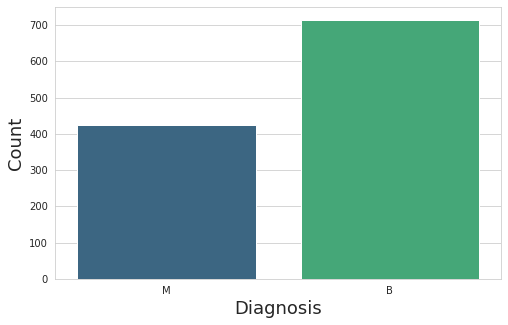

In [29]:
# Countplot for the feature 'diagnosis' 

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='diagnosis', data=df2, palette='viridis')
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Diagnosis', fontsize = 18);

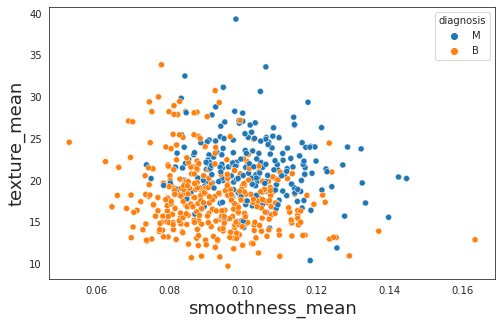

In [30]:
# Scatter plot between smoothness_mean and texture_mean

plt.figure(figsize=(8,5))
sns.set_style('white')
sns.scatterplot(x='smoothness_mean', y='texture_mean', data=df2, hue='diagnosis')
plt.ylabel('texture_mean', fontsize = 18)
plt.xlabel('smoothness_mean', fontsize = 18);

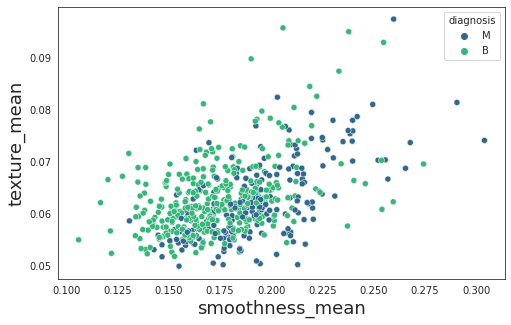

In [31]:
# Scatter plot between smoothness_mean and texture_mean

plt.figure(figsize=(8,5))
sns.set_style('white')
sns.scatterplot(x='symmetry_mean', y='fractal_dimension_mean', data=df2, hue='diagnosis', palette='viridis')
plt.ylabel('texture_mean', fontsize = 18)
plt.xlabel('smoothness_mean', fontsize = 18);

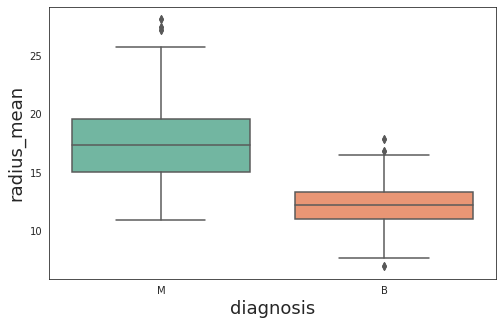

In [38]:
plt.figure(figsize=(8,5))
sns.set_style('white')
sns.boxplot(x='diagnosis',y='radius_mean',data=df2, palette="Set2")
plt.ylabel('radius_mean', fontsize = 18)
plt.xlabel('diagnosis', fontsize = 18);

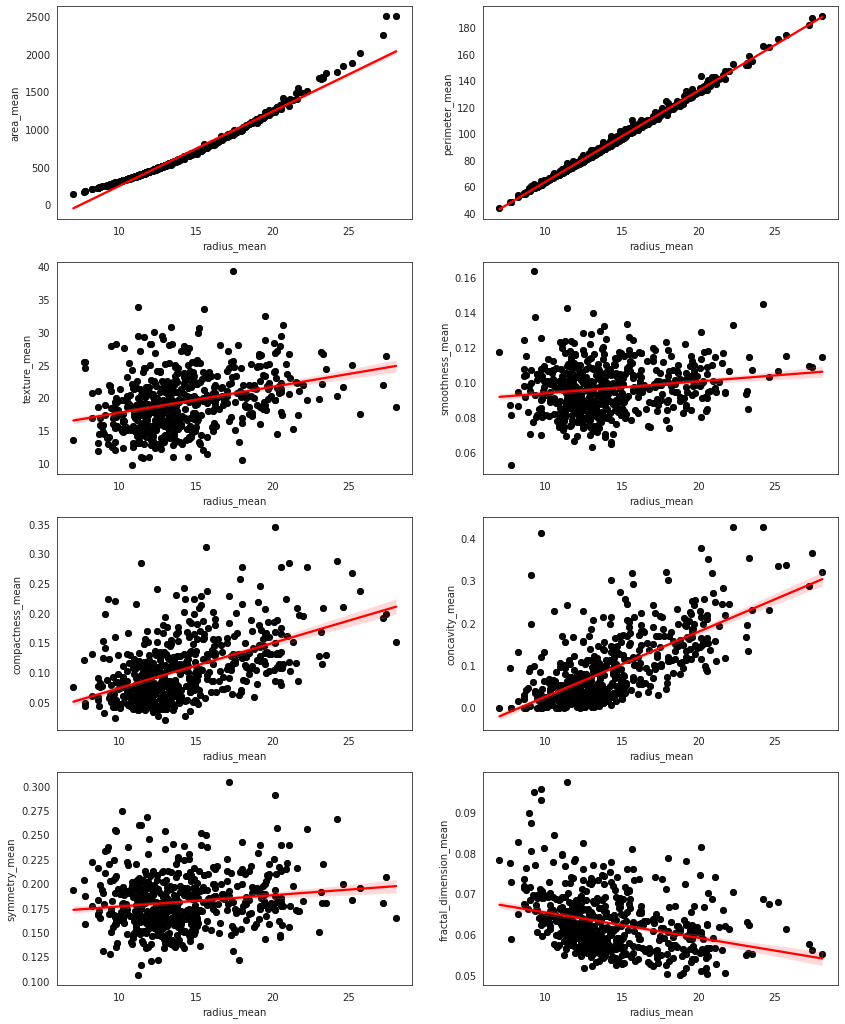

In [32]:
fig,((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(14,18))
sns.regplot(x='radius_mean',y='area_mean',data=df2,scatter=True,scatter_kws={"color": "black"}, line_kws={"color": "red"},fit_reg=True,ax=ax1)
sns.regplot(x='radius_mean',y='perimeter_mean',data=df2,scatter_kws={"color": "black"}, line_kws={"color": "red"},scatter=True,fit_reg=True,ax=ax2)
sns.regplot(x='radius_mean',y='texture_mean',data=df2,scatter_kws={"color": "black"}, line_kws={"color": "red"},scatter=True,fit_reg=True,ax=ax3)
sns.regplot(x='radius_mean',y='smoothness_mean',data=df2,scatter_kws={"color": "black"}, line_kws={"color": "red"},scatter=True,fit_reg=True,ax=ax4)
sns.regplot(x='radius_mean',y='compactness_mean',data=df2,scatter=True,scatter_kws={"color": "black"}, line_kws={"color": "red"},fit_reg=True,ax=ax5)
sns.regplot(x='radius_mean',y='concavity_mean',data=df2,scatter=True,scatter_kws={"color": "black"}, line_kws={"color": "red"},fit_reg=True,ax=ax6)
sns.regplot(x='radius_mean',y='symmetry_mean',data=df2,scatter=True,scatter_kws={"color": "black"}, line_kws={"color": "red"},fit_reg=True,ax=ax7)
sns.regplot(x='radius_mean',y='fractal_dimension_mean',data=df2,scatter=True,scatter_kws={"color": "black"}, line_kws={"color": "red"},fit_reg=True,ax=ax8)

<Figure size 720x576 with 0 Axes>

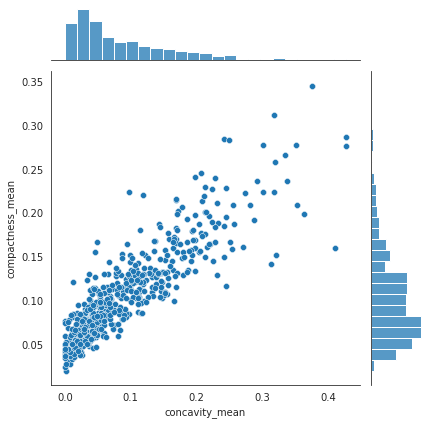

In [40]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.jointplot(x="concavity_mean",y="compactness_mean",data=df2)
plt.ylabel('radius_mean', fontsize = 18)
plt.xlabel('diagnosis', fontsize = 18);

In [41]:
corr = df2.corr()

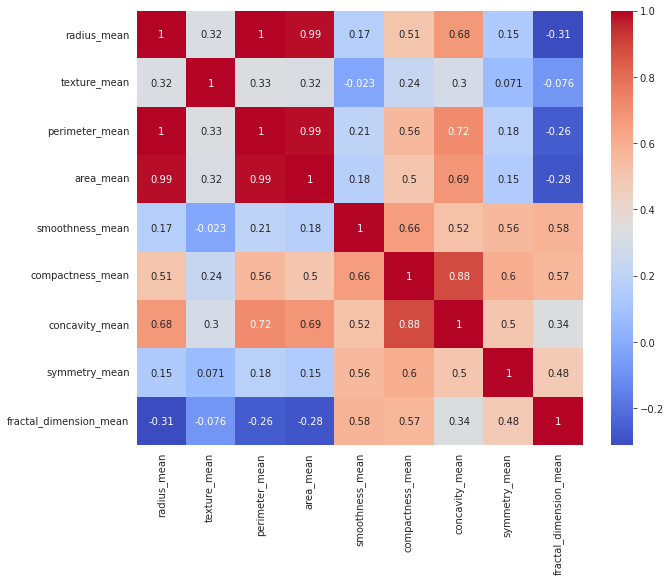

In [42]:
# Heat Map

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm');